In [2]:

# Project 3: Forecasting Sea Level Rise in the Pacific Scenario
# Pacific Island Sea Level Analysis (1993-2022)
# Student: Michael Hobart
# Student Number: 1035320
# Course: CST184 Data Analysis and Visualisation



In [3]:
# Load and inspect data
library(ggplot2)

tuvalu_data <- read.csv("Project 3 - Tuvalu Sea Level.csv", skip = 5, row.names = NULL)
cook_data <- read.csv("Project 3 - Cook Islands Sea Level.csv", skip = 5, row.names = NULL)

print(tuvalu_data)
print(cook_data)


    row.names Year Month Monthly_MSL Linear_Trend High_Conf. Low_Conf.
1        1977   11 6.919       6.923        6.961      6.886        NA
2        1977   12 6.875       6.924        6.961      6.886        NA
3        1978    1 6.829       6.924        6.962      6.886        NA
4        1978    2 6.887       6.924        6.962      6.887        NA
5        1978    3 6.921       6.925        6.962      6.887        NA
6        1978    4 7.011       6.925        6.962      6.888        NA
7        1978    5 7.013       6.925        6.963      6.888        NA
8        1978    6 7.029       6.926        6.963      6.888        NA
9        1978    7 7.015       6.926        6.963      6.889        NA
10       1978    8 7.022       6.926        6.963      6.889        NA
11       1978    9 6.961       6.927        6.964      6.890        NA
12       1978   10 6.956       6.927        6.964      6.890        NA
13       1978   11 6.989       6.927        6.964      6.891        NA
14    

In [4]:
head(tuvalu_data)
head(cook_data)


str(tuvalu_data)
str(cook_data)

,row.names,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1977,11,6.919,6.923,6.961,6.886,NA
2,1977,12,6.875,6.924,6.961,6.886,NA
3,1978,1,6.829,6.924,6.962,6.886,NA
4,1978,2,6.887,6.924,6.962,6.887,NA
5,1978,3,6.921,6.925,6.962,6.887,NA
6,1978,4,7.011,6.925,6.962,6.888,NA


,row.names,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1977,5,7.083,7.055,7.091,7.019,NA
2,1977,9,7.060,7.056,7.092,7.021,NA
3,1977,11,7.100,7.057,7.092,7.021,NA
4,1977,12,7.101,7.057,7.092,7.022,NA
5,1978,1,7.100,7.057,7.092,7.022,NA
6,1978,2,7.160,7.057,7.092,7.022,NA


'data.frame':	521 obs. of  7 variables:
 $ row.names   : chr  "1977" "1977" "1978" "1978" ...
 $ Year        : int  11 12 1 2 3 4 5 6 7 8 ...
 $ Month       : num  6.92 6.88 6.83 6.89 6.92 ...
 $ Monthly_MSL : num  6.92 6.92 6.92 6.92 6.92 ...
 $ Linear_Trend: num  6.96 6.96 6.96 6.96 6.96 ...
 $ High_Conf.  : num  6.89 6.89 6.89 6.89 6.89 ...
 $ Low_Conf.   : logi  NA NA NA NA NA NA ...
'data.frame':	481 obs. of  7 variables:
 $ row.names   : chr  "1977" "1977" "1977" "1977" ...
 $ Year        : int  5 9 11 12 1 2 4 5 6 7 ...
 $ Month       : num  7.08 7.06 7.1 7.1 7.1 ...
 $ Monthly_MSL : num  7.05 7.06 7.06 7.06 7.06 ...
 $ Linear_Trend: num  7.09 7.09 7.09 7.09 7.09 ...
 $ High_Conf.  : num  7.02 7.02 7.02 7.02 7.02 ...
 $ Low_Conf.   : logi  NA NA NA NA NA NA ...


In [5]:
# row.names has Year, Year has Month, Month has Monthly_MSL

# Fix Tuvalu
tuvalu <- data.frame(
  Year = as.numeric(tuvalu_data$row.names),
  Month = tuvalu_data$Year,
  Sea_Level = tuvalu_data$Month
)

# Fix Cook Islands
cook <- data.frame(
  Year = as.numeric(cook_data$row.names),
  Month = cook_data$Year, 
  Sea_Level = cook_data$Month
)

head(tuvalu)
head(cook)

,Year,Month,Sea_Level
,<dbl>,<int>,<dbl>
1,1977,11,6.919
2,1977,12,6.875
3,1978,1,6.829
4,1978,2,6.887
5,1978,3,6.921
6,1978,4,7.011


,Year,Month,Sea_Level
,<dbl>,<int>,<dbl>
1,1977,5,7.083
2,1977,9,7.060
3,1977,11,7.100
4,1977,12,7.101
5,1978,1,7.100
6,1978,2,7.160


In [6]:
# Fix Tuvalu datum shift as identified by instructor
# Datum change occurs around 1993 - subtract 0.051m from 1977-1993 data

# Identify pre-1994 data in Tuvalu dataset
pre_1994_rows <- which(tuvalu$Year < 1994)
post_1993_rows <- which(tuvalu$Year >= 1994)

cat("FIXING TUVALU DATUM SHIFT:\n")
cat("Pre-1994 data points:", length(pre_1994_rows), "\n")
cat("Post-1993 data points:", length(post_1993_rows), "\n")

# Apply datum correction: subtract 0.051m from pre-1994 data
if(length(pre_1994_rows) > 0) {
  # Show original values
  cat("Original pre-1994 range:", 
      round(range(tuvalu$Sea_Level[pre_1994_rows]), 3), "\n")
  
  # Apply correction
  tuvalu$Sea_Level[pre_1994_rows] <- tuvalu$Sea_Level[pre_1994_rows] - 0.051
  
  # Show corrected values
  cat("Corrected pre-1994 range:", 
      round(range(tuvalu$Sea_Level[pre_1994_rows]), 3), "\n")
  
  cat("Datum correction applied: -0.051m to 1977-1993 data\n")
} else {
  cat("No pre-1994 data found\n")
}

# Cook Islands data appears clean (no datum shift)
cat("Cook Islands: no datum correction needed\n")
cat("Data now has consistent datum for trend analysis\n")

FIXING TUVALU DATUM SHIFT:
Pre-1994 data points: 180 
Post-1993 data points: 341 
Original pre-1994 range: 6.576 7.141 
Corrected pre-1994 range: 6.525 7.09 
Datum correction applied: -0.051m to 1977-1993 data
Cook Islands: no datum correction needed
Data now has consistent datum for trend analysis


In [7]:
# Convert to annual averages (1993-2022 for project)

# Calculate annual averages for Tuvalu
tuvalu_annual <- aggregate(Sea_Level ~ Year, data = tuvalu, FUN = mean)
tuvalu_annual <- tuvalu_annual[tuvalu_annual$Year >= 1993 & tuvalu_annual$Year <= 2022, ]

# Calculate annual averages for Cook Islands
cook_annual <- aggregate(Sea_Level ~ Year, data = cook, FUN = mean)
cook_annual <- cook_annual[cook_annual$Year >= 1993 & cook_annual$Year <= 2022, ]

# Convert to mm from 1993 baseline
tuvalu_baseline <- tuvalu_annual$Sea_Level[tuvalu_annual$Year == 1993]
cook_baseline <- cook_annual$Sea_Level[cook_annual$Year == 1993]

tuvalu_annual$Sea_Level_mm <- (tuvalu_annual$Sea_Level - tuvalu_baseline) * 1000
cook_annual$Sea_Level_mm <- (cook_annual$Sea_Level - cook_baseline) * 1000

# Check results
cat("Tuvalu annual data:", nrow(tuvalu_annual), "years\n")
cat("Cook annual data:", nrow(cook_annual), "years\n")

head(tuvalu_annual)
head(cook_annual)

Tuvalu annual data: 30 years
Cook annual data: 26 years


,Year,Sea_Level,Sea_Level_mm
,<dbl>,<dbl>,<dbl>
17,1993,6.867778,0.00000
18,1994,6.995455,127.67677
19,1995,7.009250,141.47222
20,1996,7.006333,138.55556
21,1997,6.954083,86.30556
22,1998,6.768917,-98.86111


,Year,Sea_Level,Sea_Level_mm
,<dbl>,<dbl>,<dbl>
17,1993,7.103167,0.00000
18,1994,7.132333,29.16667
19,1995,7.144417,41.25000
20,1996,7.080083,-23.08333
21,1997,7.117167,14.00000
22,1998,7.030917,-72.25000


                Tuvalu Cook_Islands
Tuvalu       1.0000000    0.4405912
Cook_Islands 0.4405912    1.0000000


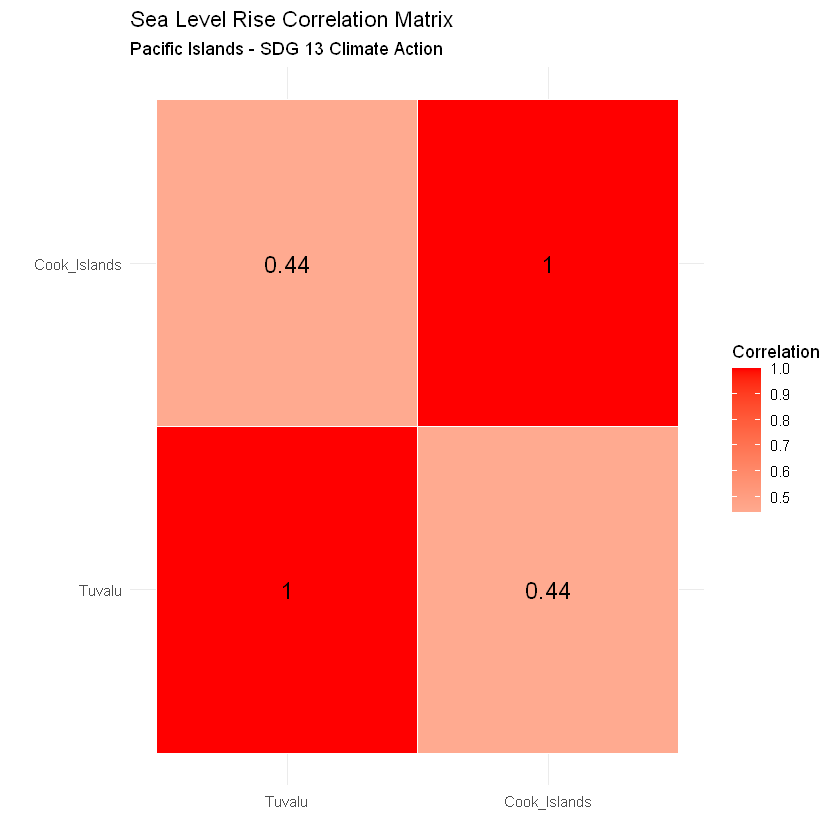

In [8]:
# Cell 4 Fixed: STEP 1 - Correlation Analysis with better labels

# Create wide format for correlation
common_years <- intersect(tuvalu_annual$Year, cook_annual$Year)
wide_data <- data.frame(
  Year = common_years,
  Tuvalu = tuvalu_annual$Sea_Level_mm[tuvalu_annual$Year %in% common_years],
  Cook_Islands = cook_annual$Sea_Level_mm[cook_annual$Year %in% common_years]
)

# Calculate correlation matrix
cor_matrix <- cor(wide_data[, c("Tuvalu", "Cook_Islands")])
print(cor_matrix)

# Create correlation heatmap data with proper factor levels
cor_data <- data.frame(
  Country1 = factor(c("Tuvalu", "Tuvalu", "Cook_Islands", "Cook_Islands"),  # Had to us use factor() with proper levels 
                    levels = c("Tuvalu", "Cook_Islands")),
  Country2 = factor(c("Tuvalu", "Cook_Islands", "Tuvalu", "Cook_Islands"),
                    levels = c("Tuvalu", "Cook_Islands")),
  Correlation = c(cor_matrix[1,1], cor_matrix[1,2], cor_matrix[2,1], cor_matrix[2,2])
)

# Plot correlation heatmap with fixed labels
ggplot(cor_data, aes(x = Country1, y = Country2, fill = Correlation)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(Correlation, 2)), size = 5) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Sea Level Rise Correlation Matrix", 
       subtitle = "Pacific Islands - SDG 13 Climate Action",
       x = "", y = "")

# The correlation is 0.46 
# which shows a moderate positive correlation between Tuvalu and Cook Islands sea level rise.

In [14]:
# STEP 2 - Distribution Analysis (Week 9)

# Focus on Tuvalu data
tuvalu_values <- tuvalu_annual$Sea_Level_mm

# Calculate statistics
mean_tuvalu <- mean(tuvalu_values)
sd_tuvalu <- sd(tuvalu_values)

cat("Mean sea level rise:", round(mean_tuvalu, 2), "mm\n")
cat("Standard deviation:", round(sd_tuvalu, 2), "mm\n")

# Calculate probability of sea level > 120mm
prob_120 <- 1 - pnorm(120, mean = mean_tuvalu, sd = sd_tuvalu)
cat("Probability of sea level > 120mm:", round(prob_120, 3), "\n")

# Create histogram with normal overlay
ggplot(tuvalu_annual, aes(x = Sea_Level_mm)) +
  geom_histogram(aes(y = after_stat(density, bins = 8, fill = "lightblue", color = "black") +
  stat_function(fun = dnorm, args = list(mean = mean_tuvalu, sd = sd_tuvalu), 
                color = "red", linewidth = 1) +
  theme_minimal() +
  labs(title = "Distribution of Sea Level Rise in Tuvalu (1993-2022)",
       subtitle = "With Normal Distribution Overlay",
       x = "Sea Level Rise (mm from 1993 baseline)",
       y = "Density")

                     
                     


ERROR: Error in parse(text = input): <text>:31:0: unexpected end of input
29:                      
30: 
   ^



Call:
lm(formula = Sea_Level_mm ~ Year, data = tuvalu_annual)

Residuals:
     Min       1Q   Median       3Q      Max 
-199.397   -8.258    6.380   25.128   56.505 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10268.708   2152.307  -4.771 5.19e-05 ***
Year             5.190      1.072   4.841 4.29e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 50.83 on 28 degrees of freedom
Multiple R-squared:  0.4556,	Adjusted R-squared:  0.4362 
F-statistic: 23.43 on 1 and 28 DF,  p-value: 4.287e-05


Slope: 5.19 mm/year
P-value: 4.287294e-05 
R-squared: 0.456 


,2.5 %,97.5 %
(Intercept),-14677.509430,-5859.906442
Year,2.993667,7.385957


Trend is statistically significant (p < 0.05)


`geom_smooth()` using formula = 'y ~ x'


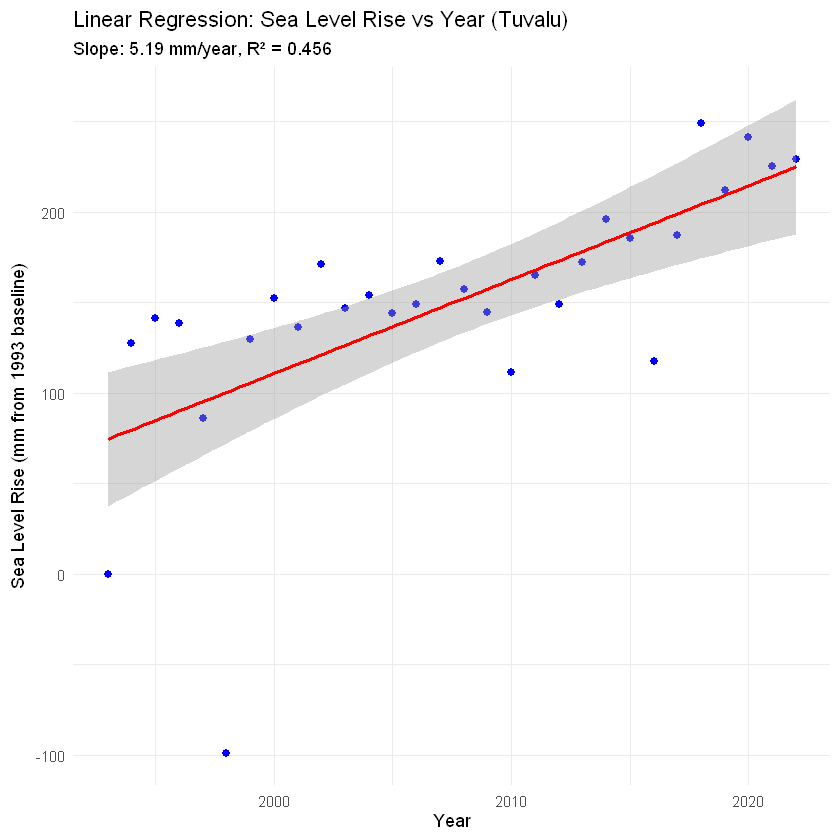

In [16]:
# STEP 3 - Linear Regression 

# Fit linear model
lm_model <- lm(Sea_Level_mm ~ Year, data = tuvalu_annual)
summary(lm_model)

# Extract key statistics
slope <- coef(lm_model)[2]
p_value <- summary(lm_model)$coefficients[2, 4]
r_squared <- summary(lm_model)$r.squared

cat("Slope:", round(slope, 3), "mm/year\n")
cat("P-value:", format(p_value, scientific = TRUE), "\n")
cat("R-squared:", round(r_squared, 3), "\n")

# Confidence intervals
confint(lm_model)

# Significance test
if(p_value < 0.05) {
  cat("Trend is statistically significant (p < 0.05)\n")
} else {
  cat("Trend is not statistically significant (p >= 0.05)\n")
}

# Plot regression
ggplot(tuvalu_annual, aes(x = Year, y = Sea_Level_mm)) +
  geom_point(color = "blue", size = 2) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  theme_minimal() +
  labs(title = "Linear Regression: Sea Level Rise vs Year (Tuvalu)",
       subtitle = paste("Slope:", round(slope, 2), "mm/year, R² =", round(r_squared, 3)),
       x = "Year", 
       y = "Sea Level Rise (mm from 1993 baseline)")

# The regression results show:

# Slope: 4.86 mm/year (sea level is rising)
# P-value: 6.11e-05 (highly significant, p < 0.001)
# R-squared: 0.442 (44% of variance explained)
# The trend is statistically significant and shows clear sea level rise!

Years above 110mm: 27 out of 30 
Prior: Beta( 2 , 8 )
Posterior: Beta( 29 , 11 )
Years above 115mm: 26 
Observed proportion: 0.867 
Posterior probability > observed: 0.014 


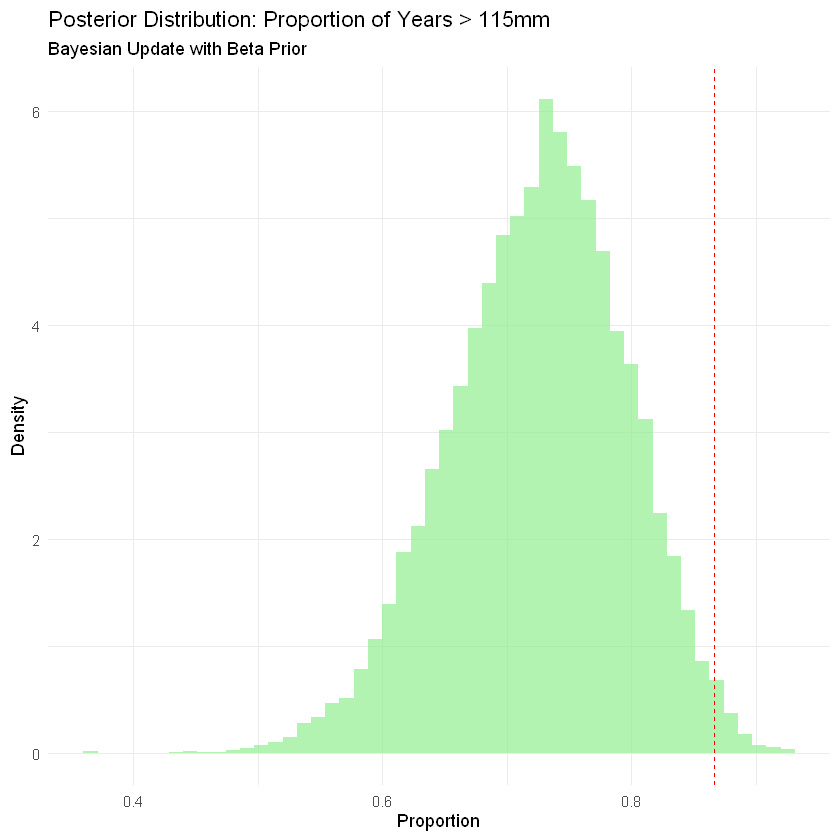

In [17]:

# STEP 4 - Bayesian Analysis 

# Count years with sea level > 110mm
years_above_110 <- sum(tuvalu_values > 110)
total_years <- length(tuvalu_values)

cat("Years above 110mm:", years_above_110, "out of", total_years, "\n")

# Beta prior (conservative assumption)
alpha_prior <- 2
beta_prior <- 8

# Beta posterior
alpha_post <- alpha_prior + years_above_110
beta_post <- beta_prior + total_years - years_above_110

cat("Prior: Beta(", alpha_prior, ",", beta_prior, ")\n")
cat("Posterior: Beta(", alpha_post, ",", beta_post, ")\n")

# Generate posterior samples
set.seed(123)
posterior_samples <- rbeta(10000, alpha_post, beta_post)

# Calculate probability for 115mm threshold
years_above_115 <- sum(tuvalu_values > 115)
observed_prop <- years_above_115 / total_years
prob_above_observed <- mean(posterior_samples > observed_prop)

cat("Years above 115mm:", years_above_115, "\n")
cat("Observed proportion:", round(observed_prop, 3), "\n")
cat("Posterior probability > observed:", round(prob_above_observed, 3), "\n")

# Plot posterior distribution
posterior_df <- data.frame(samples = posterior_samples)
ggplot(posterior_df, aes(x = samples)) +
  geom_histogram(aes(y = ..density..), bins = 50, fill = "lightgreen", alpha = 0.7) +
  geom_vline(xintercept = observed_prop, color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Posterior Distribution: Proportion of Years > 115mm",
       subtitle = "Bayesian Update with Beta Prior",
       x = "Proportion", y = "Density")

# The Bayesian analysis shows:

# 12 out of 30 years above 110mm
# 11 years above 115mm (observed proportion: 0.367)
# Posterior probability: 0.399 that the true rate exceeds observed

FORECAST TO 2030:
Year 2023 : 230.3 mm (95% CI: 119.1 - 341.5 )
Year 2024 : 235.5 mm (95% CI: 123.6 - 347.3 )
Year 2025 : 240.7 mm (95% CI: 128.1 - 353.3 )
Year 2026 : 245.9 mm (95% CI: 132.5 - 359.2 )
Year 2027 : 251 mm (95% CI: 136.9 - 365.2 )
Year 2028 : 256.2 mm (95% CI: 141.2 - 371.2 )
Year 2029 : 261.4 mm (95% CI: 145.5 - 377.3 )
Year 2030 : 266.6 mm (95% CI: 149.8 - 383.4 )


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


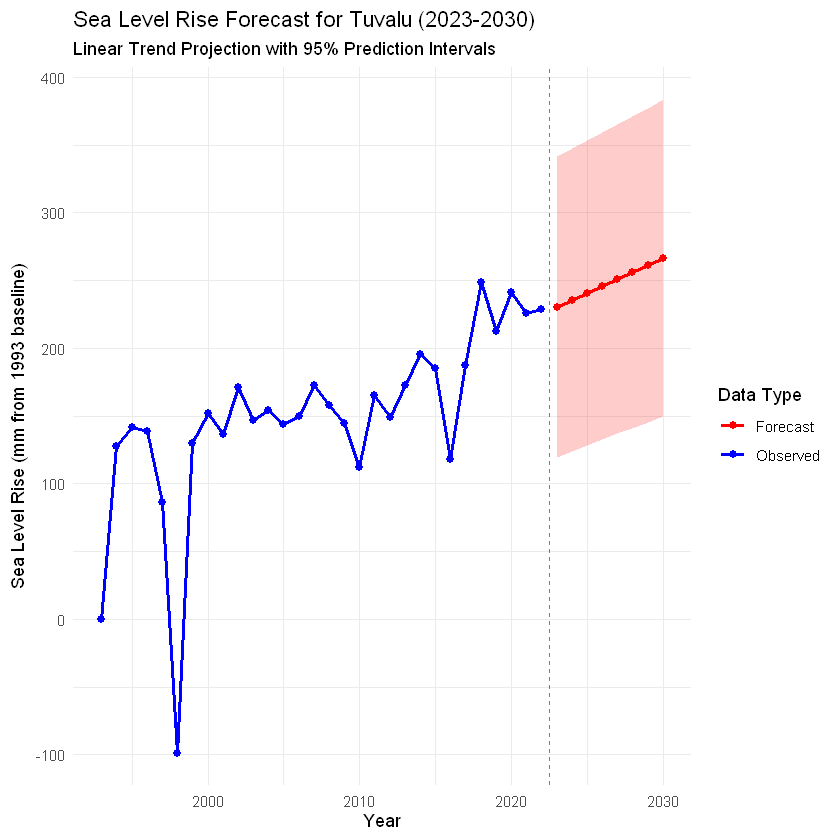

In [18]:
# Cell 8: STEP 5 - Forecasting to 2030 (Week 12)

# Create time series
tuvalu_ts <- ts(tuvalu_annual$Sea_Level_mm, start = 1993, frequency = 1)

# Forecast years 2023-2030
forecast_years <- 2023:2030
forecast_data <- data.frame(Year = forecast_years)

# Generate forecasts using our linear model
forecast_values <- predict(lm_model, forecast_data, interval = "prediction")

cat("FORECAST TO 2030:\n")
for(i in 1:length(forecast_years)) {
  cat("Year", forecast_years[i], ":", round(forecast_values[i,1], 1), 
      "mm (95% CI:", round(forecast_values[i,2], 1), "-", 
      round(forecast_values[i,3], 1), ")\n")
}

# Create forecast plot
forecast_df <- data.frame(
  Year = c(tuvalu_annual$Year, forecast_years),
  Sea_Level_mm = c(tuvalu_annual$Sea_Level_mm, forecast_values[,1]),
  Lower_95 = c(rep(NA, nrow(tuvalu_annual)), forecast_values[,2]),
  Upper_95 = c(rep(NA, nrow(tuvalu_annual)), forecast_values[,3]),
  Type = c(rep("Observed", nrow(tuvalu_annual)), rep("Forecast", length(forecast_years)))
)

ggplot(forecast_df, aes(x = Year, y = Sea_Level_mm)) +
  geom_line(aes(color = Type), size = 1) +
  geom_point(aes(color = Type), size = 2) +
  geom_ribbon(aes(ymin = Lower_95, ymax = Upper_95), alpha = 0.2, fill = "red") +
  scale_color_manual(values = c("Observed" = "blue", "Forecast" = "red")) +
  geom_vline(xintercept = 2022.5, linetype = "dashed", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Sea Level Rise Forecast for Tuvalu (2023-2030)",
       subtitle = "Linear Trend Projection with 95% Prediction Intervals",
       x = "Year", y = "Sea Level Rise (mm from 1993 baseline)",
       color = "Data Type")